In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [153]:
df.tail()

,date,value
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144
1303,2019-12-03,158549


In [154]:
df.shape

(1304, 2)

In [155]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [156]:
df['value'].max()

177588

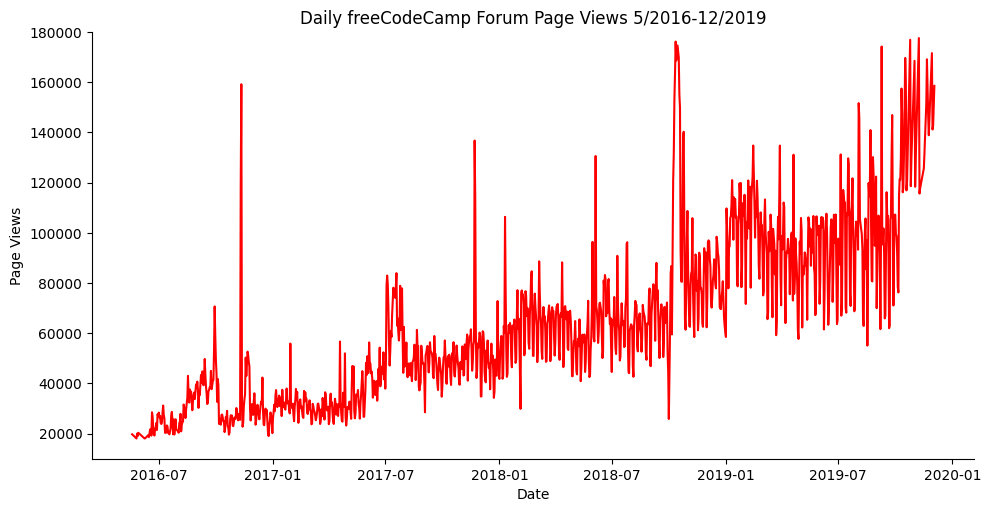

In [157]:
sns.relplot(x='date', y='value', data=df, kind='line', color = 'red', height=5, aspect=2)

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.ylim(10000, 180000)

plt.show()

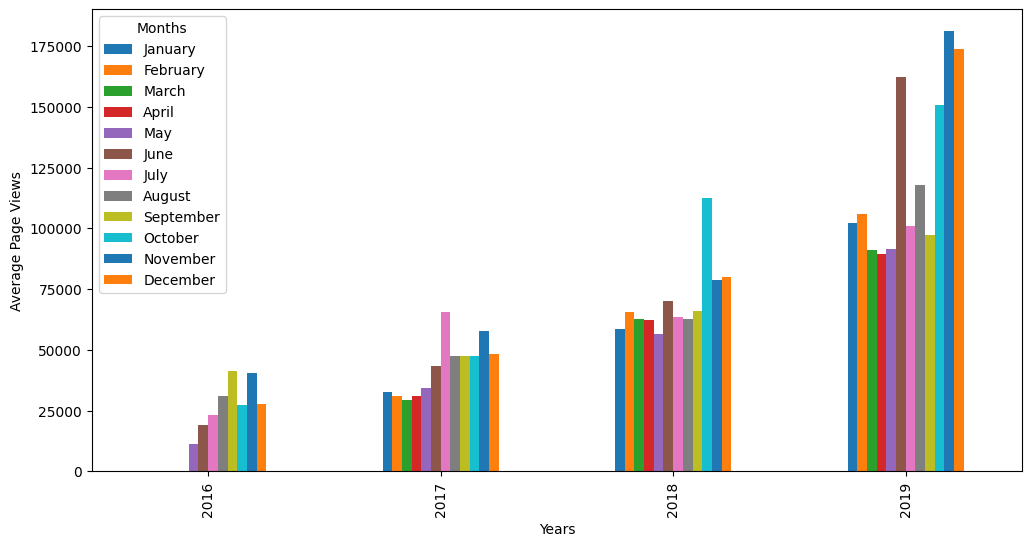

In [159]:
import calendar

df1 = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=["date"], index_col="date")

df_bar = df1.groupby([df1.index.year, df1.index.month_name()]).mean().value.unstack()
# Sort columns by month names
df_bar = df_bar[list(calendar.month_name)[1:]]
df_bar.columns.name = "Months"
fig = df_bar.plot(kind="bar", figsize=(12, 6), xlabel="Years", ylabel="Average Page Views").get_figure()

In [171]:
df_box = df.copy()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head()

,date,value,year,month
10,2016-05-19,19736,2016,May
17,2016-05-26,18060,2016,May
18,2016-05-27,19997,2016,May
19,2016-05-28,19044,2016,May
20,2016-05-29,20325,2016,May


C:\Users\chris\AppData\Local\Temp\ipykernel_19824\3654009390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax[0], x = 'year', y = 'value', data = df_box, palette = 'husl')
C:\Users\chris\AppData\Local\Temp\ipykernel_19824\3654009390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1], x = 'month', y = 'value', data = df_box, palette = 'husl', order = months)


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

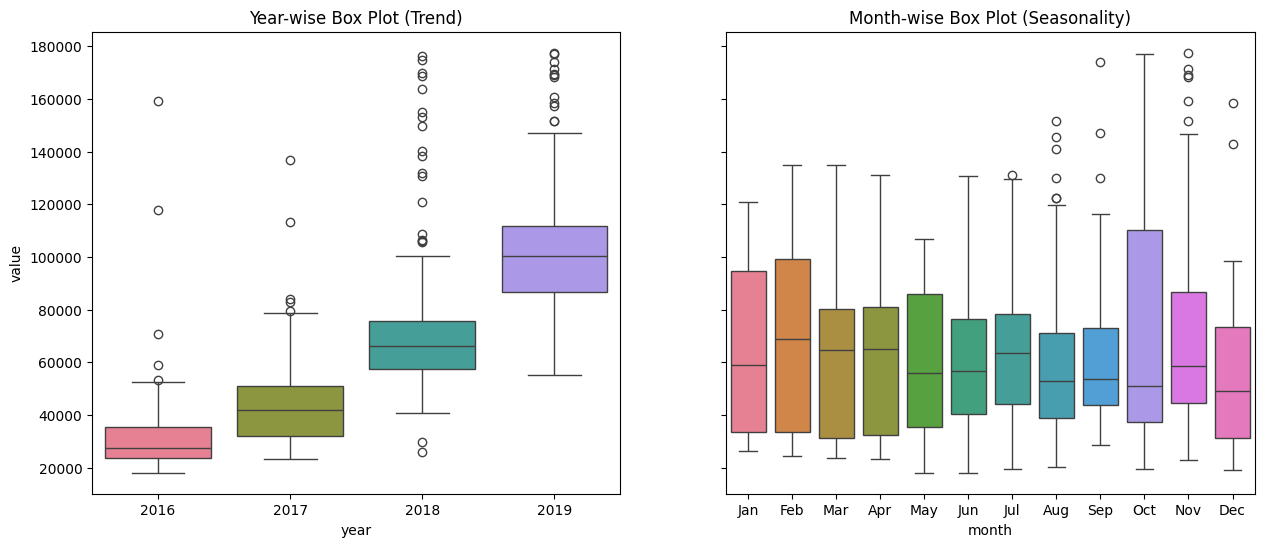

In [178]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = True)

sns.boxplot(ax = ax[0], x = 'year', y = 'value', data = df_box, palette = 'husl')
ax[0].set_title('Year-wise Box Plot (Trend)')

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sns.boxplot(ax=ax[1], x = 'month', y = 'value', data = df_box, palette = 'husl', order = months)
ax[1].set_title('Month-wise Box Plot (Seasonality)')